In [1]:
from libs.forward_lib.field_model import FieldModel

Field Space Specifications
----------------------------------------------
NA				: 0.8
Space Dimension 		: 5.12um × 5.12um × 5.12um
voxel Size 			: 0.08um × 0.08um × 0.08um
Pattern Dimension 		: 0.64um × 0.64um 
Computational Device 		: cpu


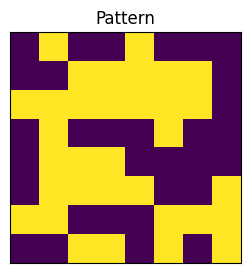

In [2]:
# Parameter Initialization
nx, ny, nz = 64, 64, 64
FM = FieldModel(nx, ny, nz)

# Model Parameters
print(FM)

# initialize dmd pattern
FM.PM.dmd.initialize_patterns()

# Visualizing D2NN pattern
FM.PM.dmd.visualize_patterns()

In [3]:
# numerical aperture
NA = 0.6
FM.PM.NA = NA

### PSF model

In [4]:
# Field Propagation
FM.propagate_field()
H2_PSF = FM.H2

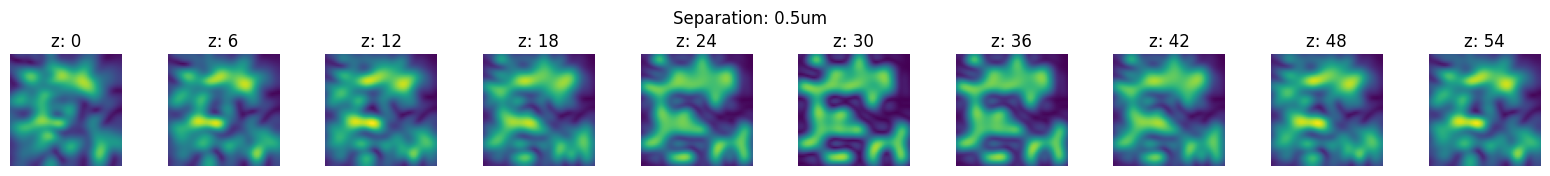

In [5]:
# Visualize at Feild at Certain Seperation
separation = 0.5
FM.visualize_at_separation(separation)
# FM.correlation_measure(separation)

### AS model

In [6]:
# Field Propagation
FM.propagate_field_AS()
H2_AS = FM.H2

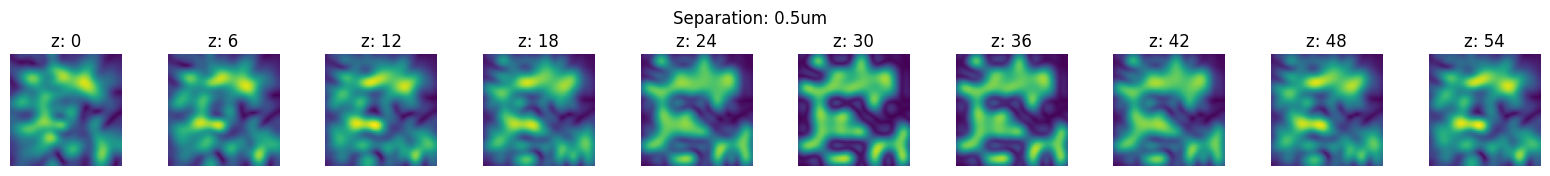

In [7]:
# Visualize at Feild at Certain Seperation
separation = 0.5
FM.visualize_at_separation(separation)
# FM.correlation_measure(separation)

### Check range

In [9]:
print("PSF model")
print(H2_PSF.max(), H2_PSF.min())
print("AS model")
print(H2_AS.max(), H2_AS.min())

PSF model
tensor(119.8199) tensor(0.2697)
AS model
tensor(1.4058) tensor(8.2328e-05)


### Quantify

In [130]:
from skimage.metrics import structural_similarity as ssim
import numpy as np
import matplotlib.pyplot as plt

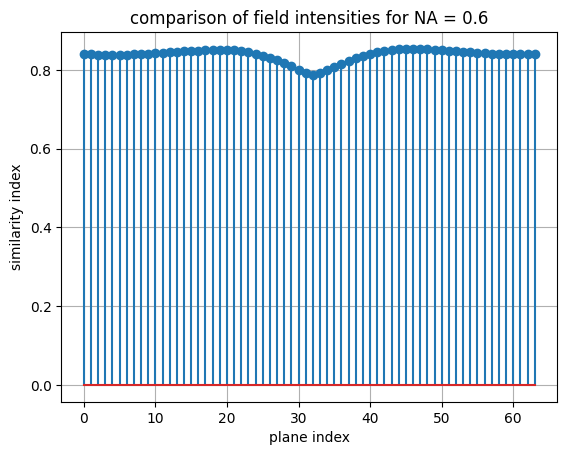

In [131]:
# normalize the fields
H2_PSF = (H2_PSF - H2_PSF.min()) / (H2_PSF.max() - H2_PSF.min() + 1e-12)
H2_AS = (H2_AS - H2_AS.min()) / (H2_AS.max() - H2_AS.min() + 1e-12)

ssims = np.zeros(nz)
for i in range(nz):
    H2_PSF_i = H2_PSF[i].numpy()
    H2_AS_i = H2_AS[i].numpy()
    ssims[i] = ssim(H2_PSF_i, H2_AS_i, data_range=np.max(H2_AS_i)-np.min(H2_AS_i))

plt.stem(ssims)
plt.title(f"comparison of field intensities for NA = {NA}")
plt.xlabel("plane index")
plt.ylabel("similarity index")
plt.grid()
plt.show()